In [12]:
from apportionment import *

In [13]:
db_file = 'coalitions.db'

if not os.path.exists(db_file):
    years = ["1994", "1998", "2002", "2006", "2010", "2012", "2016", "2020", "2023"]

    conn = sqlite3.connect(db_file)
    cur = conn.cursor()
            
    for year in years:
        cur.execute(f'''CREATE TABLE IF NOT EXISTS tab{year} (
                    iteration_number INTEGER,
                    party_number INTEGER,
                    samples INTEGER,
                    diff INTEGER
                    );''')

        with open(f'./raw_data/1m-{year}coal.csv', 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header if exists
            for i, row in enumerate(reader):
                cur.execute(f'''INSERT INTO tab{year} (iteration_number, party_number, samples, diff)
                                VALUES (?, ?, ?, ?);''', row)
            
    conn.commit()
    conn.close()


In [14]:
'''
THIS WAS ALREADY RUN
'''

# years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

# for year in [2023]:
#     with sqlite3.connect('coalitions.db') as conn:
#         cur = conn.cursor()

#         cur.execute(f'''
#             SELECT iteration_number, party_number, MIN(samples) 
#             FROM tab{year} 
#             WHERE diff < 76 
#             GROUP BY iteration_number, party_number;
#         ''')

#         results = cur.fetchall()

#         with open(f'coalitions{year}.csv', 'w', newline='') as csvfile:
#             csvwriter = csv.writer(csvfile)
#             csvwriter.writerow(['iteration_number', 'party_number', 'lowest_samples'])
#             csvwriter.writerows(results)
#         print(f'year {year} is done')



'\nTHIS WAS ALREADY RUN\n'

In [15]:
# raw2visualisable(f"1m-2023coal.csv", weighted=False)
# raw2visualisable(f"1m-2023coal.csv", weighted=False, only_electable=True)


C:\Users\janko\AppData\Local\Temp\ipykernel_8448\2446935849.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df_original = pd.concat(all_data_original, ignore_index=True)
C:\Users\janko\AppData\Local\Temp\ipykernel_8448\2446935849.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df_filtered = pd.concat(all_data_filtered, ignore_index=True)
c:\Users\janko\anaconda3x\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be 

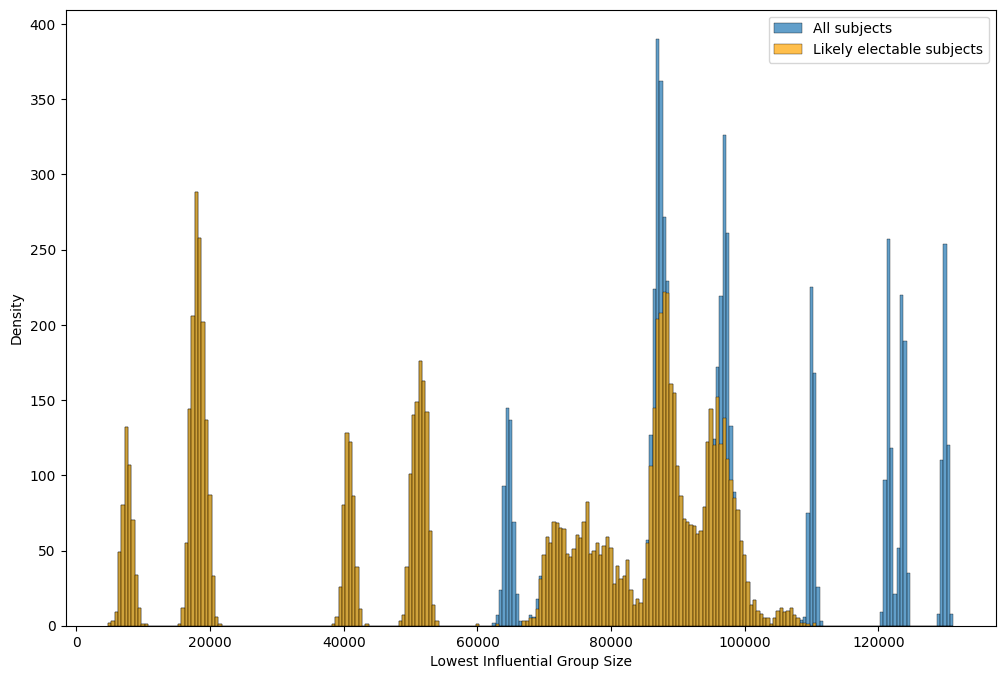

Original - Mean: 76054.16, Std Dev: 34022.39
Filtered - Mean: 64288.15, Std Dev: 31033.78


In [20]:
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

all_data_original = []
all_data_filtered = []

for year in years:
    df = pd.read_csv(f'./db_exports/coalitions{year}.csv', header=0)
    # Scale the lowest_samples based on the number of voters
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)] / 1000000)
    
    # Filtered data excluding specified party numbers
    exclude_set = constants.le_exclude[int(year)]
    df_filtered = df[~df['party_number'].isin(exclude_set)]

    # Store data for plotting
    all_data_original.append(df)
    all_data_filtered.append(df_filtered)

# Combine all years into one DataFrame for both original and filtered
combined_df_original = pd.concat(all_data_original, ignore_index=True)
combined_df_filtered = pd.concat(all_data_filtered, ignore_index=True)

# Determine the range for the bin edges based on both datasets
data_min = min(combined_df_original["lowest_samples"].min(), combined_df_filtered["lowest_samples"].min())
data_max = max(combined_df_original["lowest_samples"].max(), combined_df_filtered["lowest_samples"].max())

# Define bin edges with a consistent size
bin_width = 500
bin_edges = np.arange(data_min, data_max + bin_width, bin_width)

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot the histogram for the original data
sns.histplot(combined_df_original["lowest_samples"], bins=bin_edges, label='All Subjects', alpha=0.7)

# Plot the histogram for the filtered data
sns.histplot(combined_df_filtered["lowest_samples"], bins=bin_edges, color='orange', label='Likely Electable Subjects', alpha=0.7)

# Setup plot details
plt.xlabel('Lowest Influential Group Size')
plt.ylabel('Density')
plt.legend()
# plt.title('Histogram of Lowest Influential Group Size for All Years (Original vs. Filtered)')
plt.show()

# Calculate and print the mean and standard deviation for the combined data
for data, label in zip([combined_df_original, combined_df_filtered], ['Original', 'Filtered']):
    mean_value = np.mean(data["lowest_samples"])
    std_dev = np.std(data["lowest_samples"])
    print(f"{label} - Mean: {mean_value:.2f}, Std Dev: {std_dev:.2f}")


In [ ]:
# years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

# conn = sqlite3.connect(db_file)
# cur = conn.cursor()

# for year in years:
#     cur.execute(f'''
#     SELECT
#       total_rows,
#       selected_rows,
#       (selected_rows * 100.0 / total_rows) AS percentage
#     FROM (
#       SELECT
#         (SELECT COUNT(*) FROM tab{year}) AS total_rows,
#         (SELECT COUNT(*) FROM tab{year} WHERE diff < 76) AS selected_rows
#     )
#     ''')
#     results = cur.fetchall()
#     print(f'Year {year} : {results}')


# conn.commit()
# conn.close()

'''
Year 2023 : [(390000000, 57527774, 14.750711282051283)]
Year 2020 : [(375000000, 0, 0.0)]
Year 2016 : [(360000000, 0, 0.0)]
Year 2012 : [(405000000, 9170608, 2.2643476543209875)]
Year 2010 : [(285000000, 14527486, 5.09736350877193)]
Year 2006 : [(330000000, 0, 0.0)]
Year 2002 : [(390000000, 49934755, 12.803783333333334)]
Year 1998 : [(270000000, 0, 0.0)]
'''

Year 2023 : [(390000000, 57527774, 14.750711282051283)]
Year 2020 : [(375000000, 0, 0.0)]
Year 2016 : [(360000000, 0, 0.0)]
Year 2012 : [(405000000, 9170608, 2.2643476543209875)]
Year 2010 : [(285000000, 14527486, 5.09736350877193)]
Year 2006 : [(330000000, 0, 0.0)]
Year 2002 : [(390000000, 49934755, 12.803783333333334)]
Year 1998 : [(270000000, 0, 0.0)]


KeyboardInterrupt: 

Year 2023 - Mean: 75549, Std Dev: 36987
Year 2020 - Mean: nan, Std Dev: nan
Year 2016 - Mean: nan, Std Dev: nan
Year 2012 - Mean: 91496, Std Dev: 4511
Year 2010 - Mean: 45460, Std Dev: 35249
Year 2006 - Mean: nan, Std Dev: nan
Year 2002 - Mean: 82603, Std Dev: 28423
Year 1998 - Mean: nan, Std Dev: nan
Year 1994 - Mean: 82631, Std Dev: 757


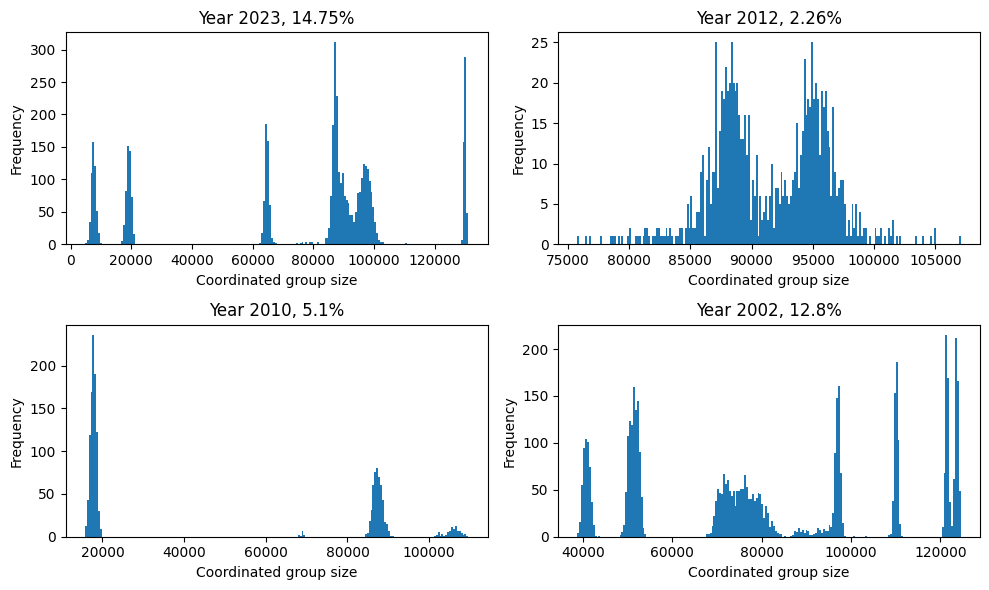

 Mean: 76054, Std Dev: 34022


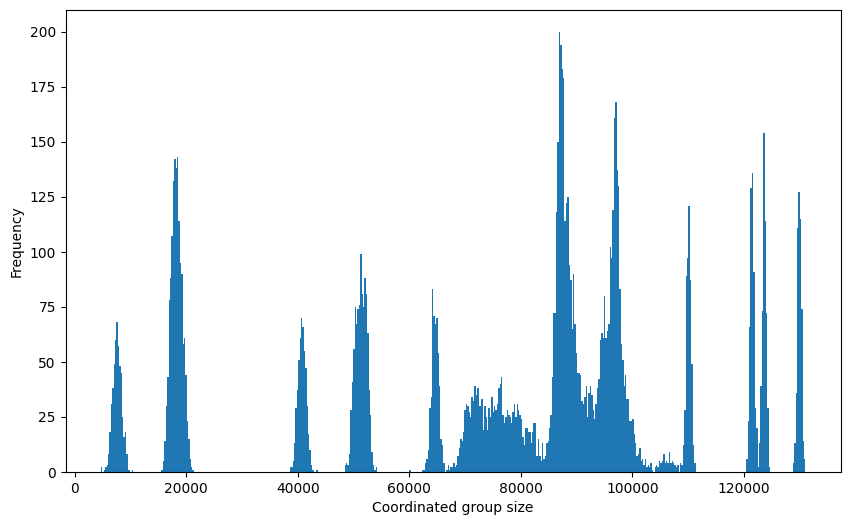

In [21]:
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

cumulative_data = []

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs = axs.ravel()

j = 0

for i, year in enumerate(years):
    df = pd.read_csv(f'./db_exports/coalitions{year}.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)]/ 1000000)
    
    cumulative_data.extend(df.iloc[:, 2])

    mean_value = np.mean(df.iloc[:, 2])
    std_dev = np.std(df.iloc[:, 2])

    print(f"Year {year} - Mean: {mean_value:.0f}, Std Dev: {std_dev:.0f}")


for i, params in enumerate([(2023, 14.75), (2012, 2.26), (2010, 5.10), (2002, 12.80)]):
    year, perc = params
    df = pd.read_csv(f'./db_exports/coalitions{year}.csv', header=0)
    df["lowest_samples"] = df["lowest_samples"] * (constants.all_voters[int(year)]/ 1000000)
    
    axs[i].hist(df.iloc[:, 2], bins=200)
    axs[i].set_xlabel('Coordinated group size')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Year {year}, {perc}%')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(cumulative_data, bins=500)
plt.xlabel('Coordinated group size')
plt.ylabel('Frequency')

cumulative_mean = np.mean(cumulative_data)
cumulative_std_dev = np.std(cumulative_data)

print(f" Mean: {cumulative_mean:.0f}, Std Dev: {cumulative_std_dev:.0f}")

plt.show()


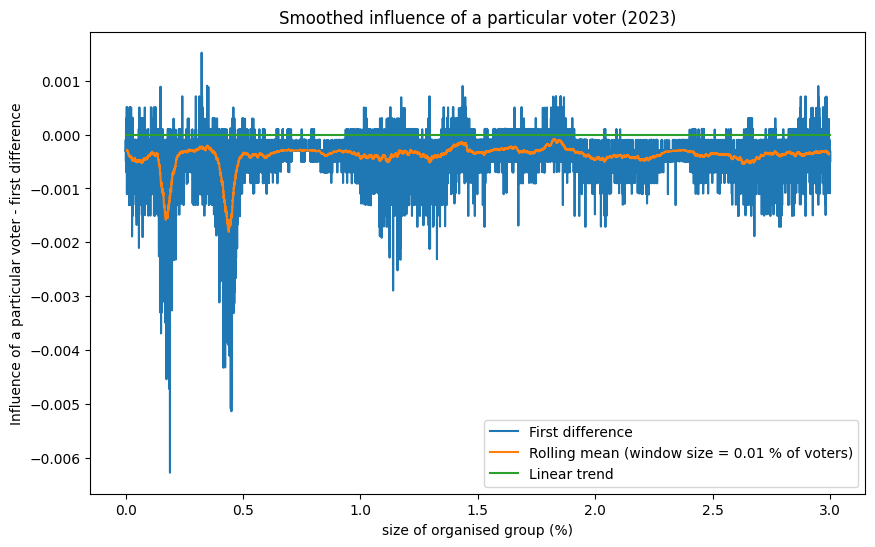

In [ ]:
# Toto je alternativny pohlad na to, cez diferenciu

df = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2023coal.csv")

x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')
plt.title('Smoothed influence of a particular voter (2023)')

plt.legend()

plt.show()